1. 메모리 절약 -> downcast
2. 스토리지 절약 (디스크 공간) -> parquet



1. 메모리 절약 : 절약을 통해 더 많은 데이터를 불러와서 더 많이 분석
2. 스토리지 절약 : 파일 크기를 줄여 더 많은 파일 저장

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../Medical/data/HP_2020_sample.csv")
df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2020,666669,8553063,3,2,9,26,2020-10-11,430102ATB,1.0,2,10,205.0,4100,2021-12-29
1,2020,666669,8553063,2,2,9,26,2020-10-11,438901ATB,1.0,2,10,70.0,1400,2021-12-29
2,2020,666669,8553063,4,2,9,26,2020-10-11,374602ATB,1.0,1,10,765.0,7650,2021-12-29
3,2020,666669,3116013,1,2,9,26,2020-05-02,546600CCM,1.0,1,1,1720.0,1720,2021-12-29
4,2020,666669,2241712,2,2,9,26,2020-05-30,451202ATE,1.0,2,7,41.0,574,2021-12-29


In [3]:
# memory usage: 88.1 MB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769852 entries, 0 to 769851
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   기준년도         769852 non-null  int64  
 1   가입자 일련번호     769852 non-null  int64  
 2   처방내역일련번호     769852 non-null  int64  
 3   일련번호         769852 non-null  int64  
 4   성별코드         769852 non-null  int64  
 5   연령대코드(5세단위)  769852 non-null  int64  
 6   시도코드         769852 non-null  int64  
 7   요양개시일자       769852 non-null  object 
 8   약품일반성분명코드    769801 non-null  object 
 9   1회 투약량       769852 non-null  float64
 10  1일투약량        769852 non-null  int64  
 11  총투여일수        769852 non-null  int64  
 12  단가           769852 non-null  float64
 13  금액           769852 non-null  int64  
 14  데이터 공개일자     769852 non-null  object 
dtypes: float64(2), int64(10), object(3)
memory usage: 88.1+ MB


In [4]:
# int, float 은 정수, 실수를 의미
# 뒤 64의 의미는 표현할 수 있는 숫자의 범위를 의미

# uint64 = 부호 없는 정수 = 0부터 양의 정수
df.dtypes

기준년도             int64
가입자 일련번호         int64
처방내역일련번호         int64
일련번호             int64
성별코드             int64
연령대코드(5세단위)      int64
시도코드             int64
요양개시일자          object
약품일반성분명코드       object
1회 투약량         float64
1일투약량            int64
총투여일수            int64
단가             float64
금액               int64
데이터 공개일자        object
dtype: object

https://github.com/rougier/numpy-tutorial#quick-references
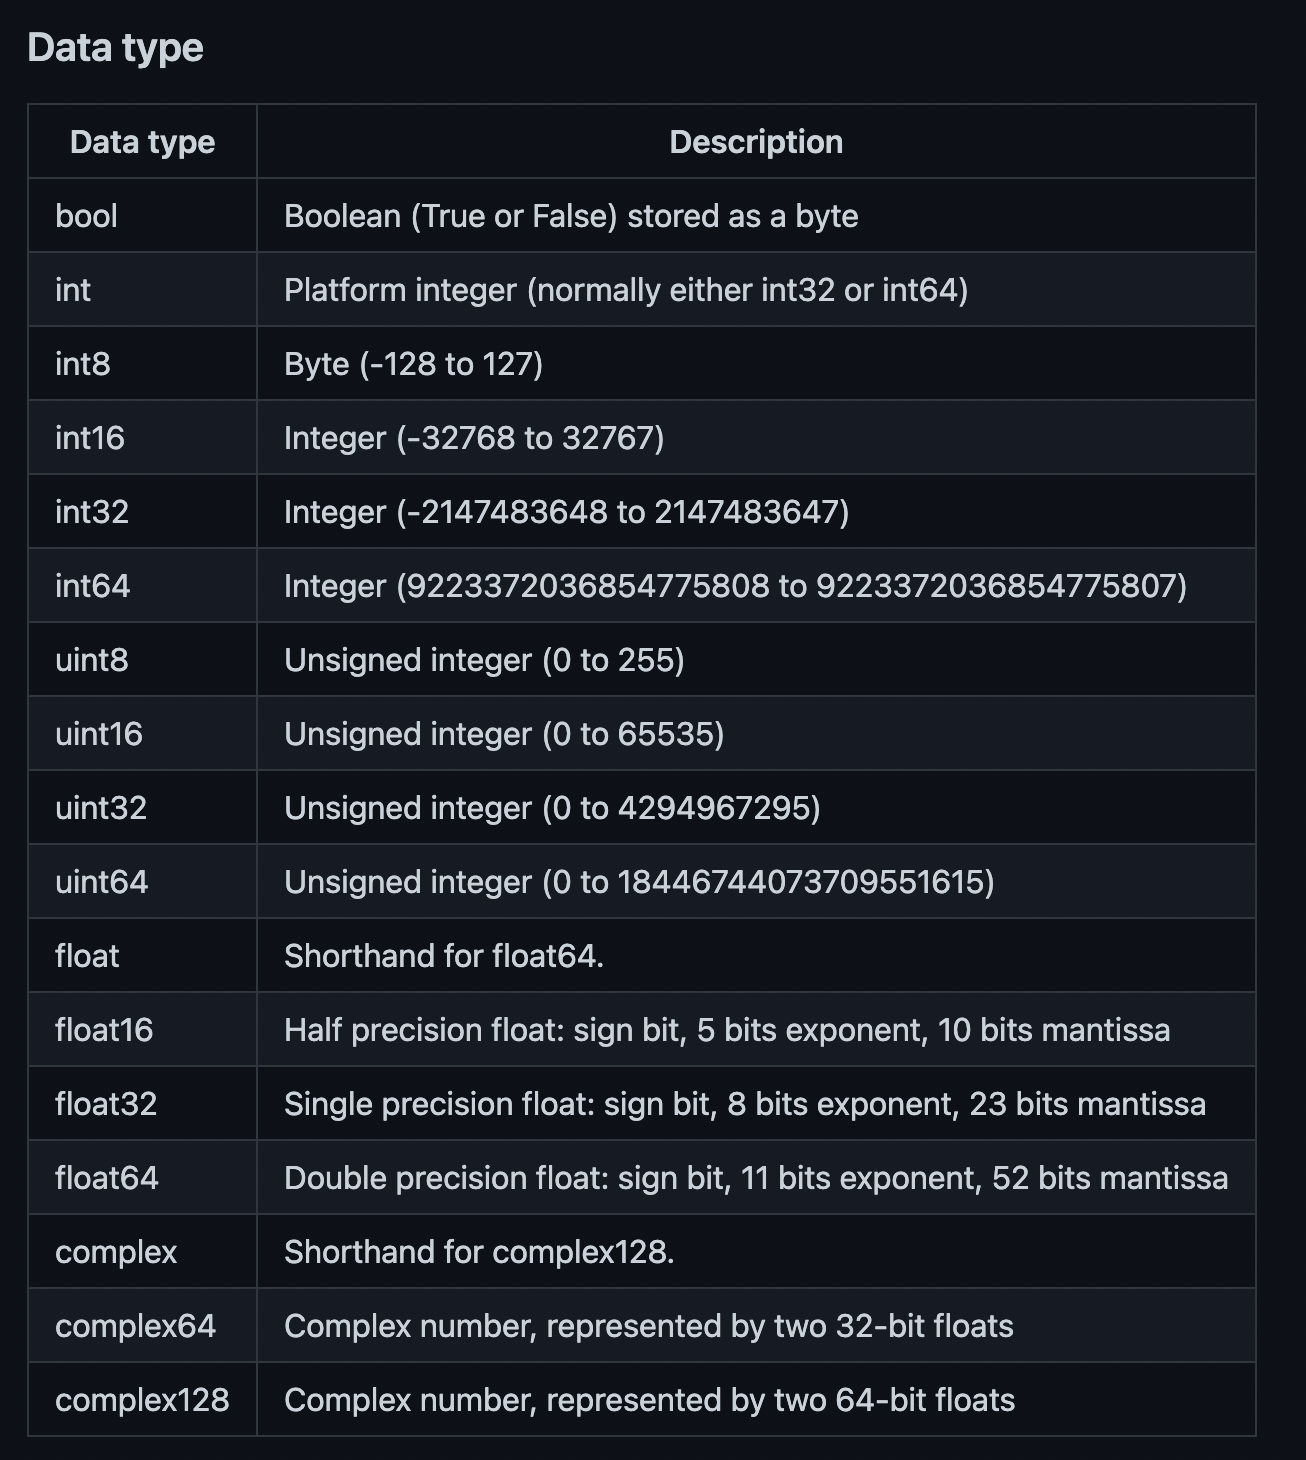

In [5]:
# 가입자 일련번호의 경우
# type : int64
# 최솟값 : 666669
# 최댓값 : 999989

# uint32 type으로 충분히 대체 가능
df.describe()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,1회 투약량,1일투약량,총투여일수,단가,금액
count,769852.0,769852.000000,7.698520e+05,769852.000000,769852.000000,769852.000000,769852.000000,769852.000000,769852.000000,769852.000000,769852.000000,7.698520e+05
mean,2020.0,835296.470423,6.435681e+06,3.042489,1.570703,11.808467,35.034811,1.506721,2.069530,15.030649,603.318387,8.477846e+03
std,0.0,94841.319865,3.722276e+06,1.933574,0.494976,4.856547,12.250978,6.030153,0.846084,21.857328,3036.582117,4.419092e+04
min,2020.0,666669.000000,4.600000e+01,1.000000,1.000000,1.000000,11.000000,0.002000,1.000000,0.000000,0.000000,0.000000e+00
25%,2020.0,755229.000000,3.211683e+06,2.000000,1.000000,10.000000,27.000000,1.000000,1.000000,3.000000,81.000000,8.820000e+02
50%,2020.0,836906.000000,6.431950e+06,3.000000,2.000000,13.000000,41.000000,1.000000,2.000000,5.000000,148.000000,2.136000e+03
75%,2020.0,916363.000000,9.664634e+06,4.000000,2.000000,15.000000,45.000000,1.000000,3.000000,21.000000,402.000000,6.930000e+03
max,2020.0,999989.000000,1.289390e+07,22.000000,2.000000,18.000000,49.000000,720.000000,23.000000,500.000000,141258.000000,8.899254e+06


In [6]:
# 1과 2로만 이루어진 성별 데이터
df["성별코드"]

0         2
1         2
2         2
3         2
4         2
         ..
769847    2
769848    2
769849    2
769850    2
769851    2
Name: 성별코드, Length: 769852, dtype: int64

In [7]:
# data type 변경
df["성별코드"] = pd.to_numeric(df["성별코드"], downcast='unsigned')

In [8]:
# type이 변경됨과 동시에 메모리 사용량이 하락
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769852 entries, 0 to 769851
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   기준년도         769852 non-null  int64  
 1   가입자 일련번호     769852 non-null  int64  
 2   처방내역일련번호     769852 non-null  int64  
 3   일련번호         769852 non-null  int64  
 4   성별코드         769852 non-null  uint8  
 5   연령대코드(5세단위)  769852 non-null  int64  
 6   시도코드         769852 non-null  int64  
 7   요양개시일자       769852 non-null  object 
 8   약품일반성분명코드    769801 non-null  object 
 9   1회 투약량       769852 non-null  float64
 10  1일투약량        769852 non-null  int64  
 11  총투여일수        769852 non-null  int64  
 12  단가           769852 non-null  float64
 13  금액           769852 non-null  int64  
 14  데이터 공개일자     769852 non-null  object 
dtypes: float64(2), int64(9), object(3), uint8(1)
memory usage: 83.0+ MB


In [9]:
# 반복문을 이용하여 전체 컬럼에 적용
df.columns

Index(['기준년도', '가입자 일련번호', '처방내역일련번호', '일련번호', '성별코드', '연령대코드(5세단위)', '시도코드',
       '요양개시일자', '약품일반성분명코드', '1회 투약량', '1일투약량', '총투여일수', '단가', '금액',
       '데이터 공개일자'],
      dtype='object')

In [10]:
# int, float 컬럼에 대하여 타입 변경
# 메모리 용량이 줄어든 것을 확인할 수 있음
for col in df.columns:
#     print(df[col].dtypes.name)
    dtype_name = df[col].dtypes.name
    if dtype_name.startswith("int"):
        if df[col].min() >= 0:
            df[col] = pd.to_numeric(df[col], downcast='unsigned')
        else:
            df[col] = pd.to_numeric(df[col], downcast='integer')
    elif dtype_name.startswith("float"):
        df[col] = pd.to_numeric(df[col], downcast='float')

# boolean type은 astype으로 변경
#     elif dtype_name == "bool":
#         df[col] = df[col].astype("int8")
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769852 entries, 0 to 769851
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   기준년도         769852 non-null  uint16 
 1   가입자 일련번호     769852 non-null  uint32 
 2   처방내역일련번호     769852 non-null  uint32 
 3   일련번호         769852 non-null  uint8  
 4   성별코드         769852 non-null  uint8  
 5   연령대코드(5세단위)  769852 non-null  uint8  
 6   시도코드         769852 non-null  uint8  
 7   요양개시일자       769852 non-null  object 
 8   약품일반성분명코드    769801 non-null  object 
 9   1회 투약량       769852 non-null  float32
 10  1일투약량        769852 non-null  uint8  
 11  총투여일수        769852 non-null  uint16 
 12  단가           769852 non-null  float32
 13  금액           769852 non-null  uint32 
 14  데이터 공개일자     769852 non-null  object 
dtypes: float32(2), object(3), uint16(2), uint32(3), uint8(5)
memory usage: 38.9+ MB


In [11]:
# object 컬럼을 category 타입으로 변경
# 메모리 용량이 줄어든 것을 확인할 수 있음

# 범주형 형태일 때 category로 지정하면 메모리를 좀 더 효율적으로 사용 가능
# 이 때 범주의 수가 너무 많다면 적합하지 않을 수 있음
for col in df.columns:
    dtype_name = df[col].dtypes.name
    if dtype_name == "object":
        df[col] = df[col].astype("category")
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769852 entries, 0 to 769851
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   기준년도         769852 non-null  uint16  
 1   가입자 일련번호     769852 non-null  uint32  
 2   처방내역일련번호     769852 non-null  uint32  
 3   일련번호         769852 non-null  uint8   
 4   성별코드         769852 non-null  uint8   
 5   연령대코드(5세단위)  769852 non-null  uint8   
 6   시도코드         769852 non-null  uint8   
 7   요양개시일자       769852 non-null  category
 8   약품일반성분명코드    769801 non-null  category
 9   1회 투약량       769852 non-null  float32 
 10  1일투약량        769852 non-null  uint8   
 11  총투여일수        769852 non-null  uint16  
 12  단가           769852 non-null  float32 
 13  금액           769852 non-null  uint32  
 14  데이터 공개일자     769852 non-null  category
dtypes: category(3), float32(2), uint16(2), uint32(3), uint8(5)
memory usage: 25.1 MB
